# Hands-on exercise

In this simple example you are required to perform a simple linear regression with scipy. Find all the information on the function in the documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

### Assignment

1) Load the provided .csv file with the used car data

2) Use a linear regression to estimate the car prices from the year, kilometers or engine power. You can make a simple 1D regression from each one of the parameters independently (as an optional task you can also try a 2D or 3D regression combining multiple cues)

3) Firstly perform the estimation using the scipy linregress function (or alternatively you can use the sklearn.linear_model.LinearRegression class).
NB: check the documentation of the two methods!! In particular be aware of the number of outputs (in case use "_" to avoid the return of a specific output).

4) Have a look at the correlation coefficient to see which of the 3 features works better

5) (optional) Then implement the least square algorithm: you should get exactly the same solution of linregress !

6) Plot the data and the lines representing the output of the linregress and least square algorithms


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
from scipy import stats
import numpy as np
import sklearn as sl
from sklearn import linear_model

In [2]:
# Load the provided data file with the used car data (you can also have a look at it with any text editor)

from numpy import double


filename = "data/km_year_power_price.csv"
lines = csv.reader(open(filename, newline=''), delimiter=',')

# place your loading code here
data = list(lines)
dataset = [data[0]]
for sublist in data[1:]:
    dataset.append([float(x) for x in sublist])
dataset = np.array(dataset, dtype=object)
dataset

array([['km', 'year', 'powerPS', 'avgPrice'],
       [125000.0, 2001.0, 40.0, 1371.11],
       [150000.0, 2001.0, 40.0, 1298.7],
       ...,
       [20000.0, 2015.0, 260.0, 49492.38],
       [10000.0, 2015.0, 300.0, 38542.69],
       [20000.0, 2015.0, 300.0, 39683.32]], dtype=object)

In [3]:
dataset[:,2:3]

array([['powerPS'],
       [40.0],
       [40.0],
       ...,
       [260.0],
       [300.0],
       [300.0]], dtype=object)

In [4]:
dataset_year = np.array(dataset[1:,1:2].ravel().tolist())
dataset_km = np.array(dataset[1:,:1].ravel().tolist())
dataset_power = np.array(dataset[1:,2:3].ravel().tolist())
dataset_price = np.array(dataset[1:,-1:].ravel().tolist())

Use linear regression to estimate the car prices from the year, kilometers or engine power. 
You can make a simple 1D regression from each one of the parameters independently 




In [5]:
# linear regression with linregress (estimate price from year)

# your code.....
slope_year, intercept_year, rvalue_year, pvalue_year, stderr_year = stats.linregress(dataset_year, dataset_price)
slope_km, intercept_km, rvalue_km, pvalue_km, stderr_km = stats.linregress(dataset_km, dataset_price)
slope_power, intercept_power, rvalue_power, pvalue_power, stderr_power = stats.linregress(dataset_power, dataset_price)

In [6]:
# (Optional) linear regression with linear_model.LinearRegression() (estimate price from year)
# Recall that in Python a mx1 matrix is different from a 1D array -> need to reshape

# your code.....
reg = linear_model.LinearRegression().fit(dataset[1:,1:2].ravel().reshape(-1, 1), dataset[1:,-1:].ravel().reshape(-1, 1))
reg.score(dataset[1:,1:2].ravel().reshape(-1, 1), dataset[1:,-1:].ravel().reshape(-1, 1))

0.45792873252401367

In [7]:
reg.coef_, reg.intercept_

(array([[1509.09382534]]), array([-3018309.48495696]))

In [8]:
slope_year, intercept_year

(1509.093825335221, -3018309.484956958)

In [ ]:
# (Optional) perform linear regression with a manually implemented least squares (estimate price from year)
# You should get exactly the same solution of linregress !

# your code.....

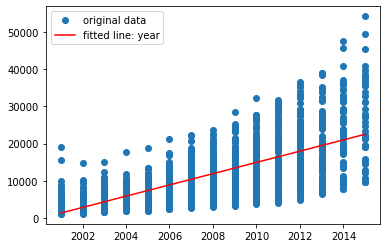

In [10]:
# Plot the data and the lines representing the output of the linregress and least square algorithms

# your code....
plt.plot(dataset_year, dataset_price, 'o', label='original data')
plt.plot(dataset_year, intercept_year + slope_year*dataset_year, 'r', label='fitted line: year')
plt.legend()
plt.show()

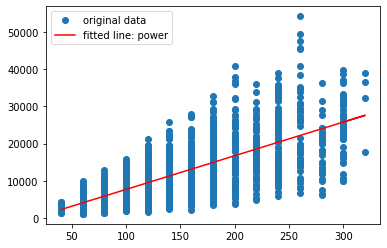

In [13]:
# linear regression with linregress (estimate price from power)

# your code.....
plt.plot(dataset_power, dataset_price, 'o', label='original data')
plt.plot(dataset_power, intercept_power + slope_power*dataset_power, 'r', label='fitted line: power')
plt.legend()
plt.show()

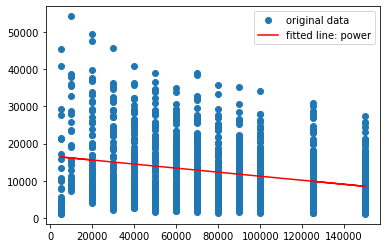

In [14]:
# linear regression with linregress (estimate price from km)

# your code...
plt.plot(dataset_km, dataset_price, 'o', label='original data')
plt.plot(dataset_km, intercept_km + slope_km*dataset_km, 'r', label='fitted line: power')
plt.legend()
plt.show()

In [15]:
# Have a look at the correlation coefficients to see which of the 3 features works better

# your code......
rvalue_year, rvalue_km, rvalue_power 

(0.676704316909544, -0.2572867429988497, 0.7085500315263967)

In [ ]:
# (Optional) 2D linear regression with linear model (estimate price from year and power)


# your code......
